# Descriptive Statistics / Results

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from pywaffle import Waffle
from matplotlib.font_manager import FontProperties
import circlify

In [54]:
#loading dataframes
entrance_df = pd.read_json('../accessibility_score/entrance_score.json', orient='index')
centroid_df = pd.read_json('../accessibility_score/centroid_score.json', orient='index')

park_entrances = pd.read_json('../get_park_data/total_park_entrances.json')
census_bbox = gpd.read_file('../get_population_data/census_final_data.json',driver= 'GeoJSON')

centroid_share = gpd.read_file('../get_isodistances/centroid_share.json',driver= 'GeoJSON')
entrance_share = gpd.read_file('../get_isodistances/entrance_share.json',driver= 'GeoJSON')

entrance_acc_score = pd.read_json('../accessibility_score/entrance_score.json', orient='index')
centroid_acc_score = pd.read_json('../accessibility_score/centroid_score.json', orient='index')

census_bbox.head()

,Einwohner,Alter_D,unter18_A,ab65_A,Auslaender_A,HHGroesse_D,Leerstandsquote,Wohnfl_Bew_D,Wohnfl_Whg_D,row_number,geometry
0,3,-9.0,0.0,0.0,0.00,-1.0,-1.0,-9.0,-1.0,census_box0,"POLYGON ((9.90980 53.41986, 9.90980 53.41085, ..."
1,3,-9.0,0.0,100.0,0.00,-1.0,-1.0,-9.0,-1.0,census_box1,"POLYGON ((10.16561 53.46473, 10.16561 53.45572..."
2,3,-9.0,0.0,0.0,0.00,-1.0,-1.0,-9.0,-1.0,census_box2,"POLYGON ((9.92465 53.51871, 9.92465 53.50972, ..."
3,3,-9.0,0.0,0.0,100.00,-1.0,-1.0,-1.0,-1.0,census_box3,"POLYGON ((9.93970 53.52771, 9.93970 53.51871, ..."
4,7,-9.0,-9.0,0.0,57.14,1.4,-1.0,-1.0,-1.0,census_box4,"POLYGON ((10.22615 53.52753, 10.22615 53.51853..."


In [55]:
entrance_count = park_entrances.groupby(["name"]).count().reset_index()
entrance_count = pd.DataFrame(entrance_count)
entrance_count = entrance_count.drop(columns = ["lat"])
entrance_count = entrance_count.rename(columns = {"long": "entrances"})
entrance_count = entrance_count.drop(entrance_count[entrance_count.name == 'Oejendorfer Park'].index)
entrance_count = entrance_count.drop(entrance_count[entrance_count.name == 'oejendorfer Park'].index)
entrance_count = entrance_count.drop(entrance_count[entrance_count.name == 'Stadtpark'].index)
entrance_count = entrance_count.drop(entrance_count[entrance_count.name == 'Altonaer Volkspark'].index)
entrance_count = entrance_count.drop(entrance_count[entrance_count.name == 'Waldpark Marienhoehe'].index)
entrance_count.sort_values(by = "entrances")

,name,entrances
21,Bolivarpark,3
31,Elbpark Entenwerder,3
24,Botanischer Sondergarten,3
42,Grothpark,3
88,Reiherstiegknie,4
...,...,...
1,Alsterpark Klein Borstel,21
98,Schwarzenberg,22
51,Harburger Stadtpark,23
120,Wilhelmsburger Inselpark,24


In [56]:
# add entrance number to entrance df
entrance_df = pd.merge(entrance_df,entrance_count, on="name")
entrance_df

,name,Einwohner,Alter_D,unter18_A,ab65_A,Auslaender_A,HHGroesse_D,Leerstandsquote,Wohnfl_Bew_D,Wohnfl_Whg_D,census_blocks,size_ha,walk_dist,size_m2,park_pop_ratio,acc_score_blocks,entrances
0,Alsenpark,9072.626025,38.776610,14.490263,12.280133,18.304357,1.845922,0.987105,34.301941,61.099637,5,1.6005,500,16005,1.764098,0.352820,7
1,Alsterpark Klein Borstel,16405.127587,42.883331,17.225356,20.601010,7.610585,2.024599,1.927127,42.887445,86.951816,11,27.2419,1000,272419,16.605723,1.509611,21
2,Alstervorland,19308.654830,43.763220,13.388264,20.745299,10.269647,1.744966,3.034436,42.497621,67.960304,8,13.7983,1000,137983,7.146174,0.893272,8
3,Alter Botanischer Garten,1878.298928,39.834559,10.462172,13.310552,22.300744,1.661962,2.560311,37.518629,61.964251,6,7.9442,500,79442,42.294652,7.049109,13
4,Alter Elbpark,8853.092696,39.792623,11.069085,12.247264,19.920892,1.675982,1.853271,36.458210,58.334004,4,5.0377,500,50377,5.690328,1.422582,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Wehbers Park,12878.371442,39.316366,12.699704,12.198784,12.219869,1.718287,1.069639,37.733739,62.337495,4,3.1201,500,31201,2.422744,0.605686,11
114,Wesselhoeftpark,1307.841926,46.813732,17.254688,29.685362,7.681149,2.159567,2.493287,50.820125,73.635379,5,4.6759,500,46759,35.752792,7.150558,7
115,Westerpark,6346.673801,43.914671,20.399621,24.496555,7.899101,2.299675,2.339698,49.203689,82.871328,10,15.5176,1000,155176,24.449973,2.444997,11
116,Wilhelmsburger Inselpark,16561.259892,40.068034,18.612115,18.199966,25.369864,2.265382,1.769146,27.423082,60.043686,13,45.3670,1000,453670,27.393447,2.107188,24


In [57]:
entrance_df.describe()

,Einwohner,Alter_D,unter18_A,ab65_A,Auslaender_A,HHGroesse_D,Leerstandsquote,Wohnfl_Bew_D,Wohnfl_Whg_D,census_blocks,size_ha,walk_dist,size_m2,park_pop_ratio,acc_score_blocks,entrances
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,6786.653512,41.966075,14.654209,18.716985,13.682908,1.932654,2.164613,40.005121,66.801093,5.584746,7.993298,618.644068,79932.983051,36.569664,4.395372,8.940678
std,5996.845675,2.804677,2.926197,5.490723,7.876732,0.246305,1.441616,8.017282,18.254366,2.619213,9.228933,213.617260,92289.328211,123.440444,6.802052,4.975654
min,32.863831,33.191809,7.144600,6.644286,4.004465,1.516718,0.036113,14.025445,0.000000,2.000000,1.018700,500.000000,10187.000000,1.314109,0.328527,3.000000
25%,2530.744036,40.114328,12.643793,14.469067,7.961613,1.774159,1.261239,36.436329,59.824203,4.000000,2.437325,500.000000,24373.250000,5.129883,1.049640,5.250000
50%,5508.690071,41.945448,14.946435,18.586194,11.310927,1.879658,1.764143,38.536714,67.641728,4.000000,4.783000,500.000000,47830.000000,9.844684,1.816801,7.000000
75%,9111.008567,43.857977,16.712655,22.761226,17.982779,2.064359,2.543555,42.623120,74.499973,6.750000,9.597975,500.000000,95979.750000,22.534613,4.102696,11.000000
max,30269.565597,49.485456,21.747413,35.347258,42.506945,2.869338,8.454797,93.340039,110.671541,13.000000,55.277000,1000.000000,552770.000000,1082.344898,30.000000,24.000000


In [58]:
centroid_df.describe()

,Einwohner,Alter_D,unter18_A,ab65_A,Auslaender_A,HHGroesse_D,Leerstandsquote,Wohnfl_Bew_D,Wohnfl_Whg_D,census_blocks,size_ha,walk_dist,size_m2,park_pop_ratio,acc_score_blocks
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,3023.662655,41.949750,14.660208,18.563508,13.627398,1.935160,2.152429,39.885384,61.095996,3.779661,7.993298,618.644068,79932.983051,119.199718,14.081830
std,2879.566783,3.022316,3.330528,5.775248,8.550157,0.262059,1.792669,10.639161,25.523675,1.536650,9.228933,213.617260,92289.328211,365.077596,16.566035
min,13.144552,28.263527,4.995749,5.496306,3.280468,1.361631,0.000000,0.000000,0.000000,1.000000,1.018700,500.000000,10187.000000,1.880774,0.589196
25%,1236.354198,40.210386,12.848592,14.181718,8.023678,1.757198,1.147675,35.935155,58.143734,3.000000,2.437325,500.000000,24373.250000,9.136023,2.646768
50%,2260.297310,41.791740,15.056795,18.692035,11.191022,1.885680,1.678847,38.195222,66.361905,4.000000,4.783000,500.000000,47830.000000,20.705384,6.655378
75%,4034.304469,44.063458,16.619428,22.328843,17.417235,2.100661,2.386855,42.174063,73.924169,4.000000,9.597975,500.000000,95979.750000,63.034695,17.828110
max,16955.228474,49.897401,22.098242,36.081777,48.773285,2.876390,11.559742,93.339023,112.777897,8.000000,55.277000,1000.000000,552770.000000,2706.064027,50.000000


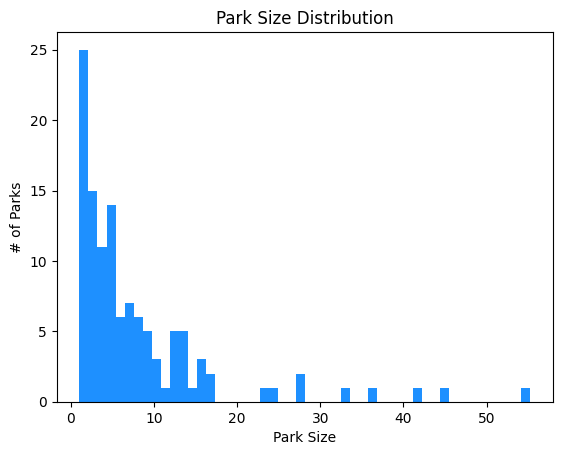

In [59]:
# histogram of park size to show park size distribution
f, ax = plt.subplots(1,1)
plt.hist(entrance_df['size_ha'],bins=50, color = 'dodgerblue')

ax.set_title('Park Size Distribution')
ax.set_xlabel('Park Size')
ax.set_ylabel('# of Parks')

plt.show()

In [60]:
park_size = entrance_df[["name","size_ha"]]
conditions = [
    (park_size['size_ha'] < 10.0),
    (park_size['size_ha'] > 10.0) & (park_size['size_ha'] <= 20.0),
    (park_size['size_ha'] > 20.0) & (park_size['size_ha'] <= 30.0),
    (park_size['size_ha'] >= 30.0)
]

values = ['< 10 ha ','< 20 ha','< 30 ha','> 30  ha']

park_size['size_bin'] = np.select(conditions,values)
park_size.head()

C:\Users\nico-\AppData\Local\Temp\ipykernel_17968\2018611643.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park_size['size_bin'] = np.select(conditions,values)


,name,size_ha,size_bin
0,Alsenpark,1.6005,< 10 ha
1,Alsterpark Klein Borstel,27.2419,< 30 ha
2,Alstervorland,13.7983,< 20 ha
3,Alter Botanischer Garten,7.9442,< 10 ha
4,Alter Elbpark,5.0377,< 10 ha


In [61]:
park_size_group = park_size.groupby("size_bin").count().reset_index()
park_size_group["share"] = park_size_group["size_ha"]/118*100
park_size_group

,size_bin,name,size_ha,share
0,< 10 ha,90,90,76.271186
1,< 20 ha,19,19,16.101695
2,< 30 ha,4,4,3.389831
3,> 30 ha,5,5,4.237288


In [62]:
# replace -1 with 0
census_bbox =  census_bbox.replace(-1,0)

#imputation means für -9 value

sociodemographic_columns = ["Einwohner", "Alter_D", "unter18_A", "ab65_A", "Auslaender_A", "HHGroesse_D", "Leerstandsquote", "Wohnfl_Bew_D", "Wohnfl_Whg_D"]
census_bbox[sociodemographic_columns] = census_bbox[sociodemographic_columns].replace(-9, pd.NA)
mean = census_bbox[sociodemographic_columns].mean()
census_bbox.fillna(mean, inplace= True)



In [63]:
census_bbox.describe()

,Einwohner,Alter_D,unter18_A,ab65_A,Auslaender_A,HHGroesse_D,Leerstandsquote,Wohnfl_Bew_D,Wohnfl_Whg_D
count,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000
mean,2063.967517,37.985064,13.957804,17.820816,8.313892,1.919664,1.457409,34.812362,65.089629
std,2927.793989,15.060137,7.723146,11.193227,10.821126,0.867314,2.444933,14.963217,31.292224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.000000,38.502500,11.190000,12.885000,2.000000,1.800000,0.000000,34.812362,65.089629
50%,588.500000,42.300000,15.425000,18.720000,5.860000,2.120000,1.000000,37.950000,65.089629
75%,3239.250000,45.190000,18.800000,23.507500,10.687500,2.430000,1.972500,43.000000,81.000000
max,20088.000000,75.000000,40.000000,100.000000,100.000000,5.000000,39.000000,93.330000,135.000000


In [64]:
entrance_census_blocks = entrance_df["census_blocks"].sum()
centroid_census_blocks = centroid_df["census_blocks"].sum()
print("entrance:", entrance_census_blocks)
print("centroid:",centroid_census_blocks)

entrance: 659
centroid: 446


### Census vs Population 

In [65]:
centroid_census_clean = centroid_share[centroid_share["Einwohner"] > 0]
entrance_census_clean = entrance_share[entrance_share["Einwohner"] > 0]


In [66]:
print("unique census blocks centroid:",centroid_share["row_number"].nunique())
print("unique census blocks entrance:",entrance_share["row_number"].nunique())



unique census blocks centroid: 248
unique census blocks entrance: 316


In [67]:
pop_entrance = entrance_df["Einwohner"].sum()
pop_centroid = centroid_df["Einwohner"].sum()

In [68]:
print("population of centroid-based approach:", pop_centroid)
print("population of entrance-based approach:", pop_entrance)

population of centroid-based approach: 356792.1933355303
population of entrance-based approach: 800825.1144676993


In [116]:
# waffle chart
data = {'labels': ['census blocks'],
        'Centroid-based approach': [248],
        'Entrance-based approach': [316],

       }
df = pd.DataFrame(data).set_index('labels')
df


,Centroid-based approach,Entrance-based approach
labels,,
census blocks,248,316


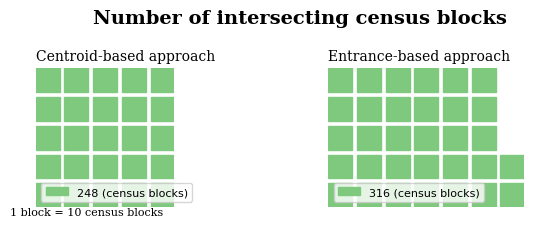

<Figure size 640x480 with 0 Axes>

In [267]:
plot = {'values': [value/10 for value in data['Centroid-based approach']],  # Convert actual number to a reasonable block number
        'labels': [f"{index} ({value})" for index, value in zip(df['Centroid-based approach'],df.index)],
        'legend': {'loc': 'lower left',  'fontsize': 8, 'title_fontproperties' : FontProperties(family='serif')},
        'title': {'label': 'Centroid-based approach', 'loc': 'left', 'fontsize': 12,"fontproperties" : "serif"}
        }
plot2 = {'values': [value/10 for value in data['Entrance-based approach']],  # Convert actual number to a reasonable block number
        'labels': [f"{index} ({value})" for index, value in zip(df['Entrance-based approach'],df.index)],
        'legend': {'loc': 'lower left',  'fontsize': 8,'title_fontproperties' : FontProperties(family='serif')},
        'title': {'label': 'Entrance-based approach', 'loc': 'left', 'fontsize': 12, "fontproperties" : "serif"}
        }

fig = plt.figure(
    FigureClass=Waffle,
    plots={221: plot, 222: plot2},
    rows=5, # Outside parameter
    cmap_name="Accent", # Change color with cmap
    rounding_rule='ceil', # Change rounding rule, so value less than 10 will still have at least 1 block
    figsize=(6, 4)
)

fig.suptitle('Number of intersecting census blocks      ',fontsize=14, fontweight='bold', fontproperties = "serif", ha = 'center')
fig.supxlabel('1 block = 10 census blocks', fontsize=8,fontproperties = "serif", x = 0.11, y = 0.46)
# Display the chart
plt.show()
plt.savefig('census_block_comparison.png', bbox_inches='tight')

In [220]:
pop_df = pd.DataFrame({
    'Name': ['Centroid-based approach', 'Entrance-based approach'],
    'Value': [356793,  800826]
})

circles = circlify.circlify(
    pop_df['Value'].tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

#circle1 = circles[0]
#circle2 = circles[1]
#
#print(circle1)
#print(circle2)
#print(circle1.x)
#circle1.x == 0.5
#print(circle1.x)

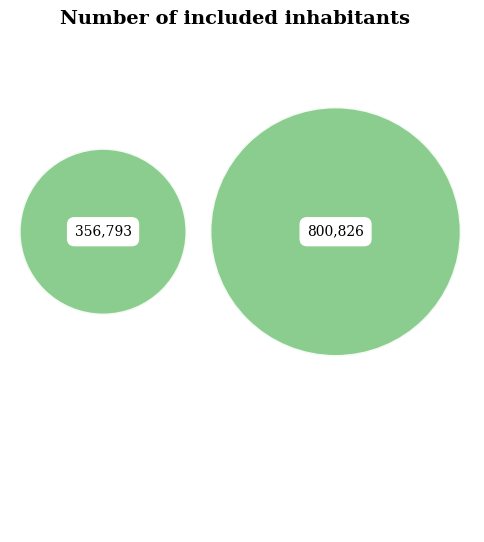

In [265]:
fig, ax = plt.subplots(figsize=(6,6))
# Title

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = pop_df['Value']

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y+0.3), r*0.9, alpha=0.9, linewidth=2, facecolor="#7DC882", edgecolor="w"))
    plt.annotate('{:,}'.format(label), (x,y+0.3 ) ,va='center', ha='center', fontproperties = "serif", bbox=dict(facecolor='white', edgecolor='w', boxstyle='round', pad=.5))
fig.suptitle('Number of included inhabitants',fontsize=14, fontweight='bold', fontproperties = "serif", ha = 'center')
plt.savefig('inhabitant_comparison.png', bbox_inches='tight')

### Accessibility Score

In [ ]:
entrance_acc_score.describe()

,Einwohner,Alter_D,unter18_A,ab65_A,Auslaender_A,HHGroesse_D,Leerstandsquote,Wohnfl_Bew_D,Wohnfl_Whg_D,census_blocks,size_ha,walk_dist,size_m2,park_pop_ratio,acc_score_blocks
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,6786.653512,41.966075,14.654209,18.716985,13.682908,1.932654,2.164613,40.005121,66.801093,5.584746,7.993298,618.644068,79932.983051,36.569664,4.395372
std,5996.845675,2.804677,2.926197,5.490723,7.876732,0.246305,1.441616,8.017282,18.254366,2.619213,9.228933,213.617260,92289.328211,123.440444,6.802052
min,32.863831,33.191809,7.144600,6.644286,4.004465,1.516718,0.036113,14.025445,0.000000,2.000000,1.018700,500.000000,10187.000000,1.314109,0.328527
25%,2530.744036,40.114328,12.643793,14.469067,7.961613,1.774159,1.261239,36.436329,59.824203,4.000000,2.437325,500.000000,24373.250000,5.129883,1.049640
50%,5508.690071,41.945448,14.946435,18.586194,11.310927,1.879658,1.764143,38.536714,67.641728,4.000000,4.783000,500.000000,47830.000000,9.844684,1.816801
75%,9111.008567,43.857977,16.712655,22.761226,17.982779,2.064359,2.543555,42.623120,74.499973,6.750000,9.597975,500.000000,95979.750000,22.534613,4.102696
max,30269.565597,49.485456,21.747413,35.347258,42.506945,2.869338,8.454797,93.340039,110.671541,13.000000,55.277000,1000.000000,552770.000000,1082.344898,30.000000


In [ ]:
centroid_acc_score.describe()

,Einwohner,Alter_D,unter18_A,ab65_A,Auslaender_A,HHGroesse_D,Leerstandsquote,Wohnfl_Bew_D,Wohnfl_Whg_D,census_blocks,size_ha,walk_dist,size_m2,park_pop_ratio,acc_score_blocks
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,3023.662655,41.949750,14.660208,18.563508,13.627398,1.935160,2.152429,39.885384,61.095996,3.779661,7.993298,618.644068,79932.983051,119.199718,14.081830
std,2879.566783,3.022316,3.330528,5.775248,8.550157,0.262059,1.792669,10.639161,25.523675,1.536650,9.228933,213.617260,92289.328211,365.077596,16.566035
min,13.144552,28.263527,4.995749,5.496306,3.280468,1.361631,0.000000,0.000000,0.000000,1.000000,1.018700,500.000000,10187.000000,1.880774,0.589196
25%,1236.354198,40.210386,12.848592,14.181718,8.023678,1.757198,1.147675,35.935155,58.143734,3.000000,2.437325,500.000000,24373.250000,9.136023,2.646768
50%,2260.297310,41.791740,15.056795,18.692035,11.191022,1.885680,1.678847,38.195222,66.361905,4.000000,4.783000,500.000000,47830.000000,20.705384,6.655378
75%,4034.304469,44.063458,16.619428,22.328843,17.417235,2.100661,2.386855,42.174063,73.924169,4.000000,9.597975,500.000000,95979.750000,63.034695,17.828110
max,16955.228474,49.897401,22.098242,36.081777,48.773285,2.876390,11.559742,93.339023,112.777897,8.000000,55.277000,1000.000000,552770.000000,2706.064027,50.000000
